In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json 

In [123]:
# 4. 검색한 칵테일 연도별 순위 변화 그래프

df = pd.read_csv("data.csv")

In [124]:
cocktail = df.drop(columns = ['Unnamed: 0', 'place', 'month'])
cocktail = df.rename(columns = {'Unnamed: 0' : 'rank'})
cocktail = cocktail[cocktail['year'] > 1990].reset_index(drop=True)

In [125]:
cocktail.head()

,rank,place,name,year,month,visitors
0,0,1,'57 Chevy,2001,total,1512
1,1,2,Caipirinha,2001,total,1301
2,2,3,Long Island Icetea,2001,total,903
3,3,4,Piña Colada,2001,total,601
4,4,5,Tall Blonde,2001,total,573


In [126]:
cocktail_aver = cocktail['rank'].groupby([cocktail['year'], cocktail['name']]).mean()

cocktail_aver

year  name                      
2001  '57 Chevy                     0.000000
      77 Sunset Strip               8.000000
      American Beauty (Aperitif)    9.000000
      Bleeding Heart                1.000000
      Caipirinha                    1.000000
                                      ...   
2020  Sex On The Beach              2.500000
      Speed King                    3.333333
      Wiki Waki Woo                 9.000000
      Zerstörer                     0.307692
      Zombie                        8.000000
Name: rank, Length: 347, dtype: float64

In [127]:
cocktail_view = {}

for i in cocktail_aver.index :
    n = i[1]
    y = i[0]
    r = cocktail_aver.loc[i]
    if n not in cocktail_view :
        cocktail_view[n] = [{y : r}]
    else :
        cocktail_view[n].append({y : r})

In [128]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [129]:
cocktail_json = json.dumps(cocktail_view, indent=4, cls=NpEncoder)
print(cocktail_json)

{
    "'57 Chevy": [
        {
            "2001": 0.0
        },
        {
            "2002": 0.0
        },
        {
            "2003": 3.888888888888889
        },
        {
            "2004": 8.0
        },
        {
            "2005": 9.0
        },
        {
            "2006": 9.0
        },
        {
            "2007": 8.555555555555555
        },
        {
            "2008": 7.153846153846154
        },
        {
            "2009": 7.3076923076923075
        },
        {
            "2010": 7.076923076923077
        },
        {
            "2011": 7.769230769230769
        },
        {
            "2012": 7.666666666666667
        },
        {
            "2013": 7.615384615384615
        },
        {
            "2014": 7.6923076923076925
        },
        {
            "2015": 7.0
        },
        {
            "2016": 6.555555555555555
        },
        {
            "2017": 4.083333333333333
        },
        {
            "2018": 4.75
        },
        {
  

In [131]:
print(cocktail_view[cocktail_input])

[{2001: 5.0}, {2002: 5.428571428571429}, {2003: 6.0}, {2014: 0.0}, {2019: 9.0}, {2020: 9.0}]


[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[0.0, 0.0, 3.888888888888889, 8.0, 9.0, 9.0, 8.555555555555555, 7.153846153846154, 7.3076923076923075, 7.076923076923077, 7.769230769230769, 7.666666666666667, 7.615384615384615, 7.6923076923076925, 7.0, 6.555555555555555, 4.083333333333333, 4.75, 2.5, 7.166666666666667]


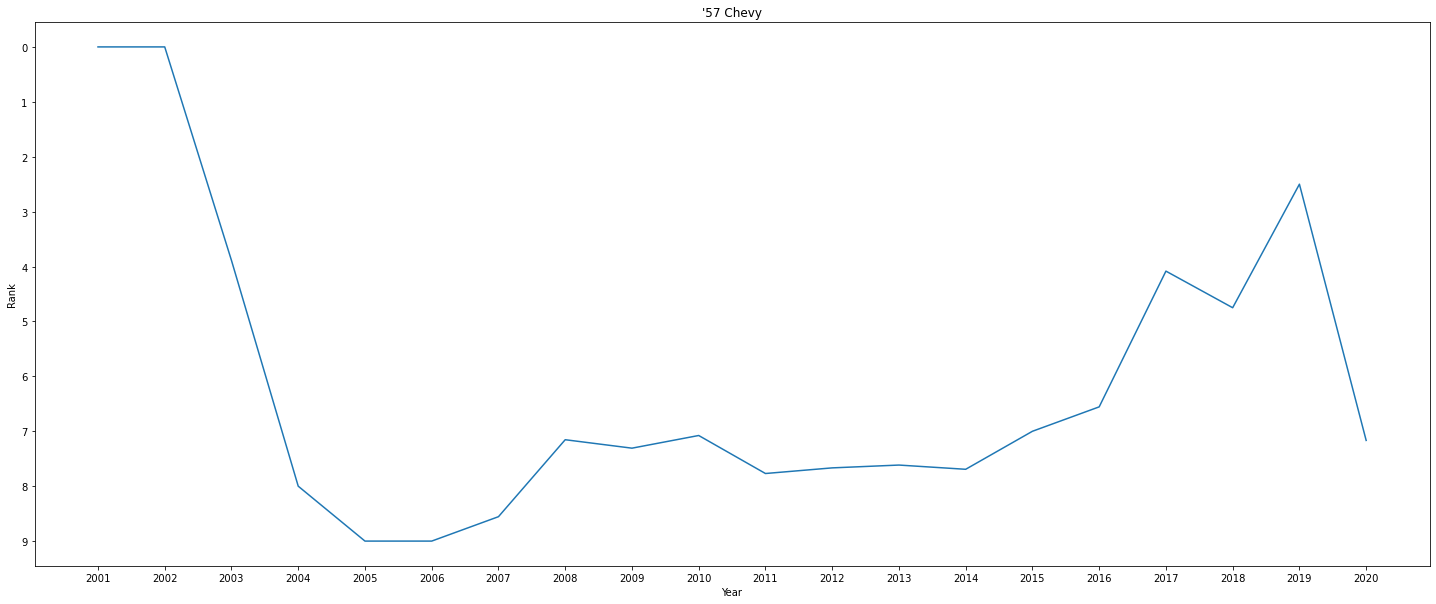

In [151]:
cocktail_input = "'57 Chevy";

y_values = []
x_values = []

for i in cocktail_view[cocktail_input] :
    temp = list(i.items())[0]
    x_values.append(temp[0])
    y_values.append(temp[1])

print(x_values)
print(y_values)

plt.figure(figsize=(25,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(x_values, y_values)
plt.title(cocktail_input)
plt.xlabel("Year")
plt.ylabel("Rank")
plt.gca().invert_yaxis()
plt.show()

[2001]
[9.0]


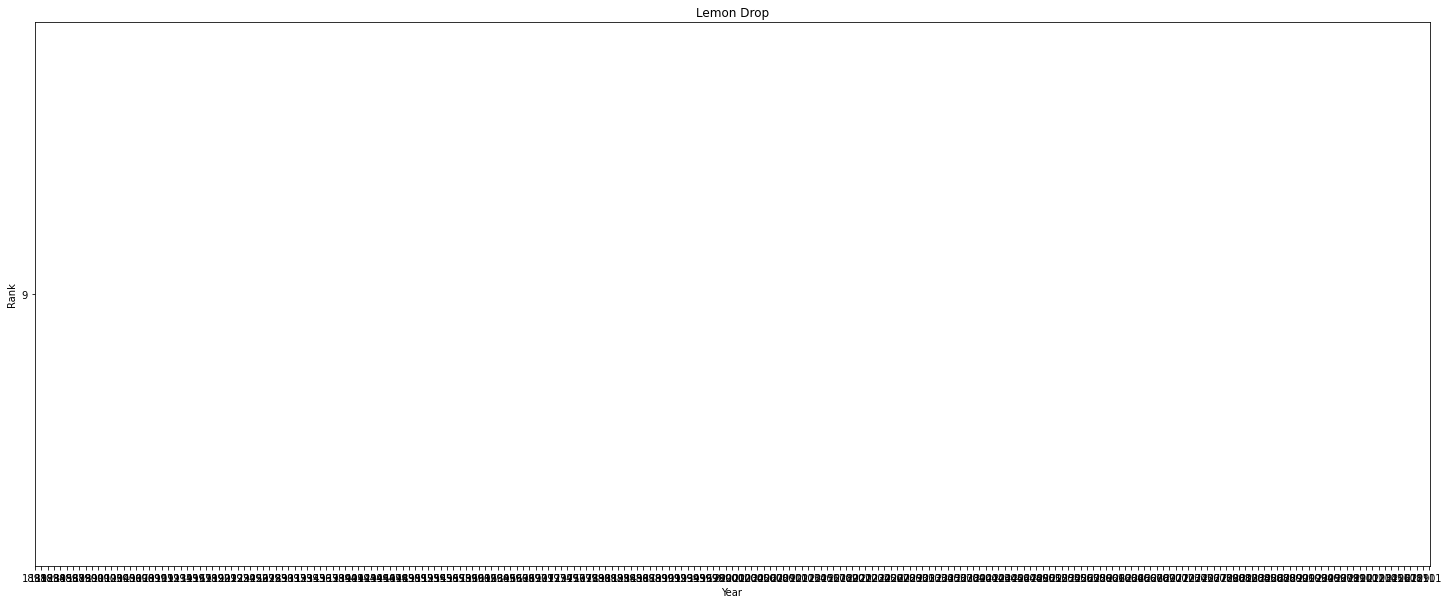

In [148]:
# 년도별 순위 리스트 개수가 1개라면 차트에 출력 안됨
cocktail_input = "Lemon Drop";

y_values = []
x_values = []

for i in cocktail_view[cocktail_input] :
    temp = list(i.items())[0]
    x_values.append(temp[0])
    y_values.append(temp[1])

print(x_values)
print(y_values)

plt.figure(figsize=(25,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(x_values, y_values)
plt.title(cocktail_input)
plt.xlabel("Year")
plt.ylabel("Rank")
plt.gca().invert_yaxis()
plt.show()